<a href="https://colab.research.google.com/github/lalitha-sahitya/stock-price-prediction/blob/main/Stock_Market_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import os

In [2]:
!pip install opendatasets

In [3]:
import warnings
warnings.filterwarnings('ignore')
import pandas as pd
import opendatasets as od
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
od.download('https://www.kaggle.com/competitions/fintech-x-ds-ucl-hackathon')

Please provide your Kaggle credentials to download this dataset. Learn more: http://bit.ly/kaggle-creds
Your Kaggle username: sahityapalacharla
Your Kaggle Key: ··········


100%|██████████| 144k/144k [00:00<00:00, 63.4MB/s]


Extracting archive ./fintech-x-ds-ucl-hackathon/fintech-x-ds-ucl-hackathon.zip to ./fintech-x-ds-ucl-hackathon


In [5]:
os.listdir('fintech-x-ds-ucl-hackathon')

['metaData.csv', 'train.csv', 'sample_submission.csv', 'test.csv']

In [6]:
data=pd.read_csv('/content/fintech-x-ds-ucl-hackathon/train.csv')
data.head()

,ID,Open,High,Low,Close,Volume,Dividends,Stock Splits,Date
0,0,1469.250000,1478.000000,1438.359985,1455.219971,931800000,0.0,0.0,2000-01-03 00:00:00-05:00
1,1,1455.219971,1455.219971,1397.430054,1399.420044,1009000000,0.0,0.0,2000-01-04 00:00:00-05:00
2,2,1399.420044,1413.270020,1377.680054,1402.109985,1085500000,0.0,0.0,2000-01-05 00:00:00-05:00
3,3,1402.109985,1411.900024,1392.099976,1403.449951,1092300000,0.0,0.0,2000-01-06 00:00:00-05:00
4,4,1403.449951,1441.469971,1400.729980,1441.469971,1225200000,0.0,0.0,2000-01-07 00:00:00-05:00


In [7]:
data['Date']=data['Date'].str.split(' ').str[0]
data=data.sort_values(by=['Date'])
data=data.drop('ID',axis=1)

In [8]:
data.head()

,Open,High,Low,Close,Volume,Dividends,Stock Splits,Date
0,1469.250000,1478.000000,1438.359985,1455.219971,931800000,0.0,0.0,2000-01-03
1,1455.219971,1455.219971,1397.430054,1399.420044,1009000000,0.0,0.0,2000-01-04
2,1399.420044,1413.270020,1377.680054,1402.109985,1085500000,0.0,0.0,2000-01-05
3,1402.109985,1411.900024,1392.099976,1403.449951,1092300000,0.0,0.0,2000-01-06
4,1403.449951,1441.469971,1400.729980,1441.469971,1225200000,0.0,0.0,2000-01-07


In [9]:
test_data=pd.read_csv('/content/fintech-x-ds-ucl-hackathon/test.csv')
test_data['Date']=test_data['Date'].str.split(' ').str[0]
test_data=test_data.sort_values(by=['Date'])
test_data=test_data.drop('ID',axis=1)

In [10]:
test_data.head()

,Open,High,Low,Volume,Dividends,Stock Splits,Date
0,3081.250000,3093.090088,3073.580078,3508160000,0.0,0.0,2019-11-08
1,3080.330078,3088.330078,3075.820068,3041120000,0.0,0.0,2019-11-11
2,3089.280029,3102.610107,3084.729980,3495560000,0.0,0.0,2019-11-12
3,3084.179932,3098.060059,3078.800049,3513720000,0.0,0.0,2019-11-13
4,3090.750000,3098.199951,3083.260010,3282090000,0.0,0.0,2019-11-14


In [11]:
data=data.set_index('Date')
test_data=test_data.set_index('Date')

In [12]:
data.head()

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2000-01-03,1469.250000,1478.000000,1438.359985,1455.219971,931800000,0.0,0.0
2000-01-04,1455.219971,1455.219971,1397.430054,1399.420044,1009000000,0.0,0.0
2000-01-05,1399.420044,1413.270020,1377.680054,1402.109985,1085500000,0.0,0.0
2000-01-06,1402.109985,1411.900024,1392.099976,1403.449951,1092300000,0.0,0.0
2000-01-07,1403.449951,1441.469971,1400.729980,1441.469971,1225200000,0.0,0.0


In [14]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4995 entries, 2000-01-03 to 2019-11-07
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Open          4995 non-null   float64
 1   High          4995 non-null   float64
 2   Low           4995 non-null   float64
 3   Close         4995 non-null   float64
 4   Volume        4995 non-null   int64  
 5   Dividends     4995 non-null   float64
 6   Stock Splits  4995 non-null   float64
dtypes: float64(6), int64(1)
memory usage: 312.2+ KB


In [15]:
data.columns

Index(['Open', 'High', 'Low', 'Close', 'Volume', 'Dividends', 'Stock Splits'], dtype='object')

In [ ]:
x=data.drop('Close',axis=1)
y=data['Close']

In [ ]:
x_train=x[:int(len(x)*0.8)]
y_train=y[:int(len(y)*0.8)]
x_test=x[int(len(x)*0.8):]
y_test=y[int(len(y)*0.8):]

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor

In [ ]:
models=[LinearRegression(),DecisionTreeRegressor(),RandomForestRegressor()]

In [ ]:
for i in models:
  model=i
  model.fit(x_train,y_train)
  preds=model.predict(x_test)
  mse=mean_squared_error(y_test,preds)
  print(mse)

54.76371927806653
251876.17547974913
252101.49031680514


In [ ]:
model=LinearRegression()
model.fit(x_train,y_train)

LinearRegression()

In [ ]:
preds=model.predict(x_test)

In [ ]:
from sklearn.metrics import mean_squared_error
mse=mean_squared_error(y_test,preds)

In [ ]:
mse

54.76371927806653

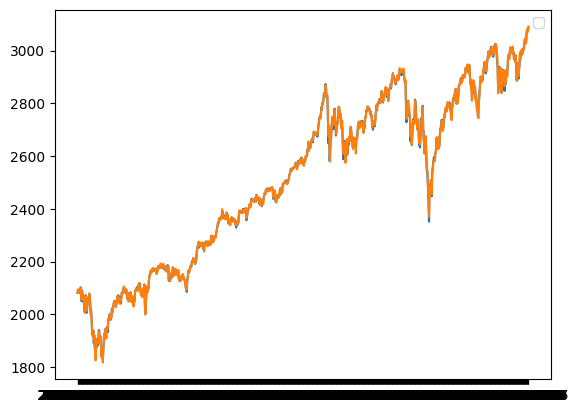

In [ ]:
plt.plot(y_test)
plt.plot(preds)
plt.legend()
plt.show()

In [ ]:
test_preds=model.predict(test_data)

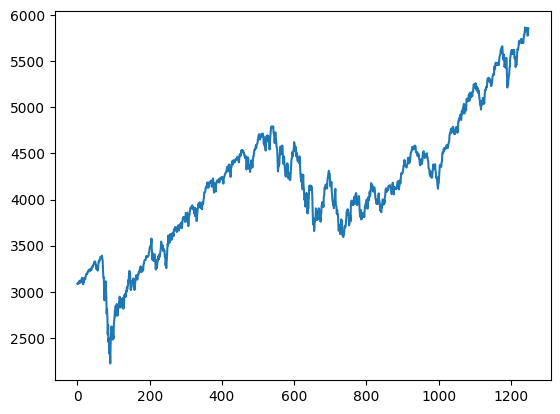

In [ ]:
plt.plot(test_preds)

In [ ]:
sub=pd.read_csv('/content/fintech-x-ds-ucl-hackathon/sample_submission.csv')
sub.head()

,ID,Close
0,4995,0
1,4996,0
2,4997,0
3,4998,0
4,4999,0


In [ ]:
sub['Close']=test_preds

In [ ]:
sub

,ID,Close
0,4995,3085.691664
1,4996,3083.807043
2,4997,3097.522386
3,4998,3092.260116
4,4999,3091.389848
...,...,...
1244,6239,5839.942366
1245,6240,5850.845123
1246,6241,5777.920848
1247,6242,5791.886242


In [ ]:
sub.to_csv('sub.csv',index=False)